## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [65]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


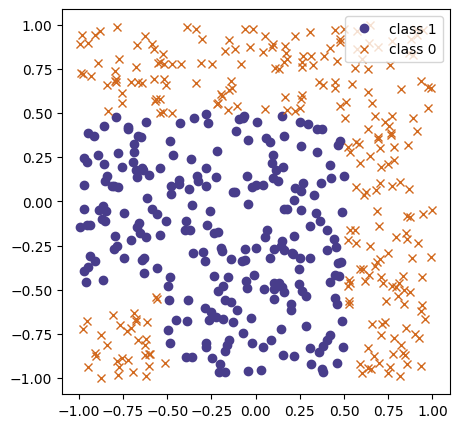

In [66]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'o', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'x', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [67]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(np.concatenate((a_2, x_mat_bias), axis=1), W2)
    y_pred = sigmoid(z_3).reshape((num_obs,))
    # Now compute the gradient
    J_z_3_grad = -(y-y_pred)
    a_2_bias = np.concatenate((a_2, x_mat_bias), axis=1)
    J_W_2_grad = np.dot(a_2_bias.T, J_z_3_grad.reshape((num_obs,1))) / num_obs
    J_z_2_grad = np.dot(J_z_3_grad.reshape((num_obs,1)), W2.T)[:, :-1] * a_2 * (1 - a_2)
    J_W_1_grad = np.dot(x_mat_full.T, J_z_2_grad) / num_obs
    gradient = (J_W_1_grad, J_W_2_grad)
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

Iteration 0, Loss: 0.7383, Accuracy: 0.5180
Iteration 200, Loss: 0.6875, Accuracy: 0.5180
Iteration 400, Loss: 0.6748, Accuracy: 0.5180
Iteration 600, Loss: 0.6675, Accuracy: 0.4880
Iteration 800, Loss: 0.6612, Accuracy: 0.5900
Iteration 1000, Loss: 0.6553, Accuracy: 0.6460
Iteration 1200, Loss: 0.6497, Accuracy: 0.6780
Iteration 1400, Loss: 0.6443, Accuracy: 0.7080
Iteration 1600, Loss: 0.6391, Accuracy: 0.7300
Iteration 1800, Loss: 0.6342, Accuracy: 0.7460
Iteration 2000, Loss: 0.6294, Accuracy: 0.7500
Iteration 2200, Loss: 0.6247, Accuracy: 0.7620
Iteration 2400, Loss: 0.6202, Accuracy: 0.7660
Iteration 2600, Loss: 0.6159, Accuracy: 0.7660
Iteration 2800, Loss: 0.6117, Accuracy: 0.7660
Iteration 3000, Loss: 0.6077, Accuracy: 0.7660
Iteration 3200, Loss: 0.6038, Accuracy: 0.7620
Iteration 3400, Loss: 0.6000, Accuracy: 0.7640
Iteration 3600, Loss: 0.5964, Accuracy: 0.7740
Iteration 3800, Loss: 0.5929, Accuracy: 0.7760
Iteration 4000, Loss: 0.5896, Accuracy: 0.7740
Iteration 4200, Loss

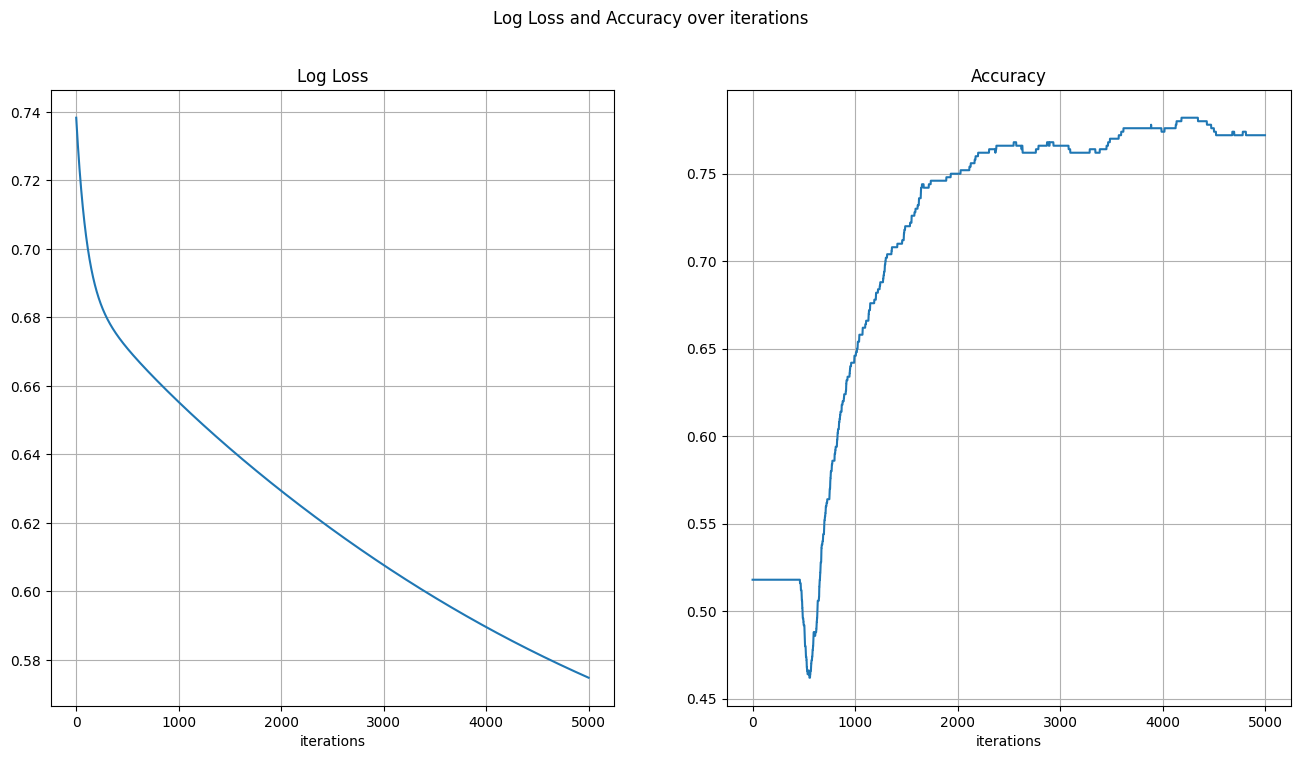

In [69]:
#### Initialize the network parameters

np.random.seed(1241)

input_dim = x_mat_1.shape[1]
hidden_dim = 4
output_dim = 1

W_1 = np.random.randn(input_dim+1, hidden_dim)
W_2 = np.random.randn(hidden_dim+1, output_dim)

num_iter = 5000
learning_rate = 0.01
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    # Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)

    # Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]

    # Compute the loss and accuracy 
    loss = loss_fn(y, y_pred)
    acc = np.sum(np.round(y_pred) == y)/len(y_pred)

    loss_vals.append(loss)
    accuracies.append(acc)

    # Print the loss and accuracy for every 200th iteration
    if i % 200 == 0:
        print("Iteration {}, Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss, acc))

plot_loss_accuracy(loss_vals, accuracies)